<a href="https://colab.research.google.com/github/hermannvargens/doutorado/blob/main/An%C3%A1lise_de_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

### Gerar um mapa de calor a partir de dados aleatórios

In [171]:
# Gerar valores seguindo uma distribuição normal com média 50 e desvio padrão 15
np.random.seed(42)  # Garantir reprodutibilidade
data = np.random.normal(loc=50, scale=15, size=810000).astype(int)

# Garantir que os valores fiquem dentro do intervalo [0,100]
data = np.clip(data, 0, 100)

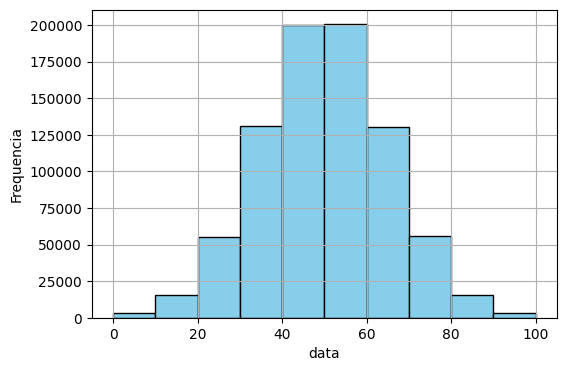

In [179]:
#plotar a distribuicao de todos os pontos
plt.figure(figsize=(6,4))
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('data')
plt.ylabel('Frequencia')
plt.grid(True)
plt.show()

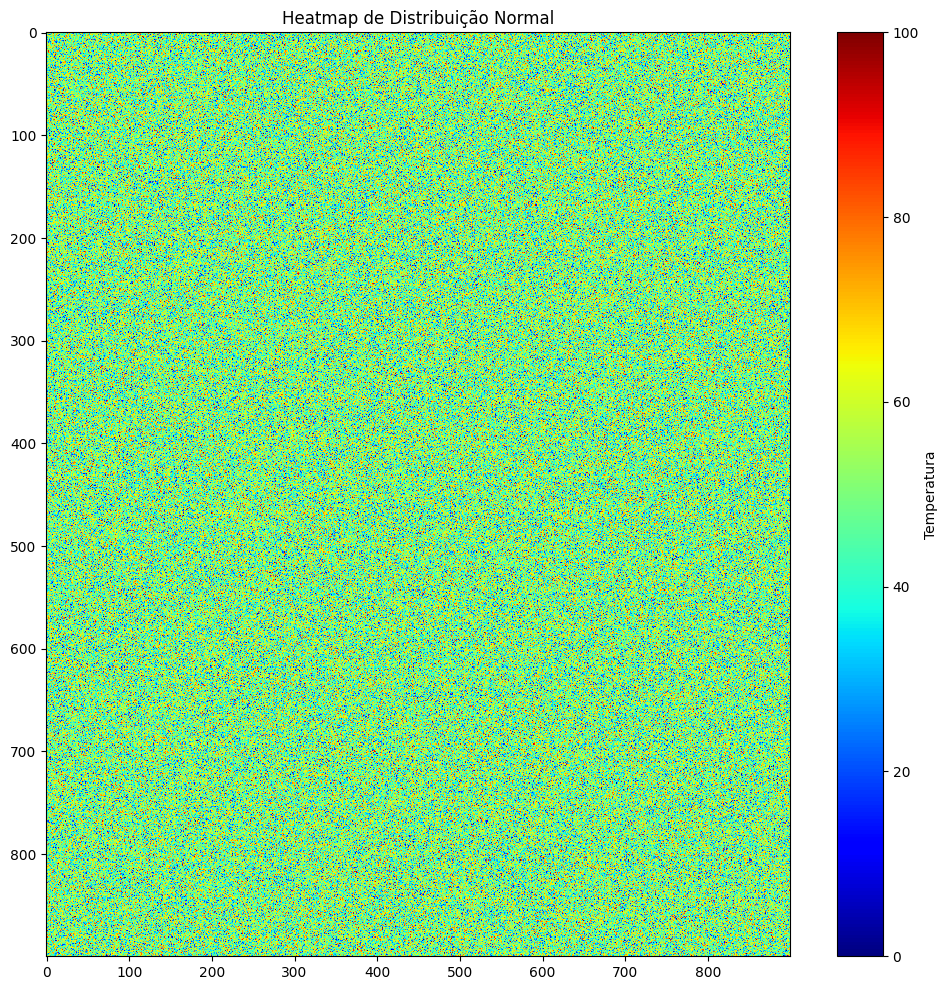

In [173]:
# Criar uma matriz para distribuir os valores no heatmap
heatmap_data = data.reshape((900,900)) # pois há 810 mil pontos

# Criar o heatmap
plt.figure(figsize=(12,12))
plt.imshow(heatmap_data, cmap="jet", aspect="auto", interpolation="nearest")
plt.colorbar(label="Temperatura")
plt.title("Heatmap de Distribuição Normal")



plt.show()


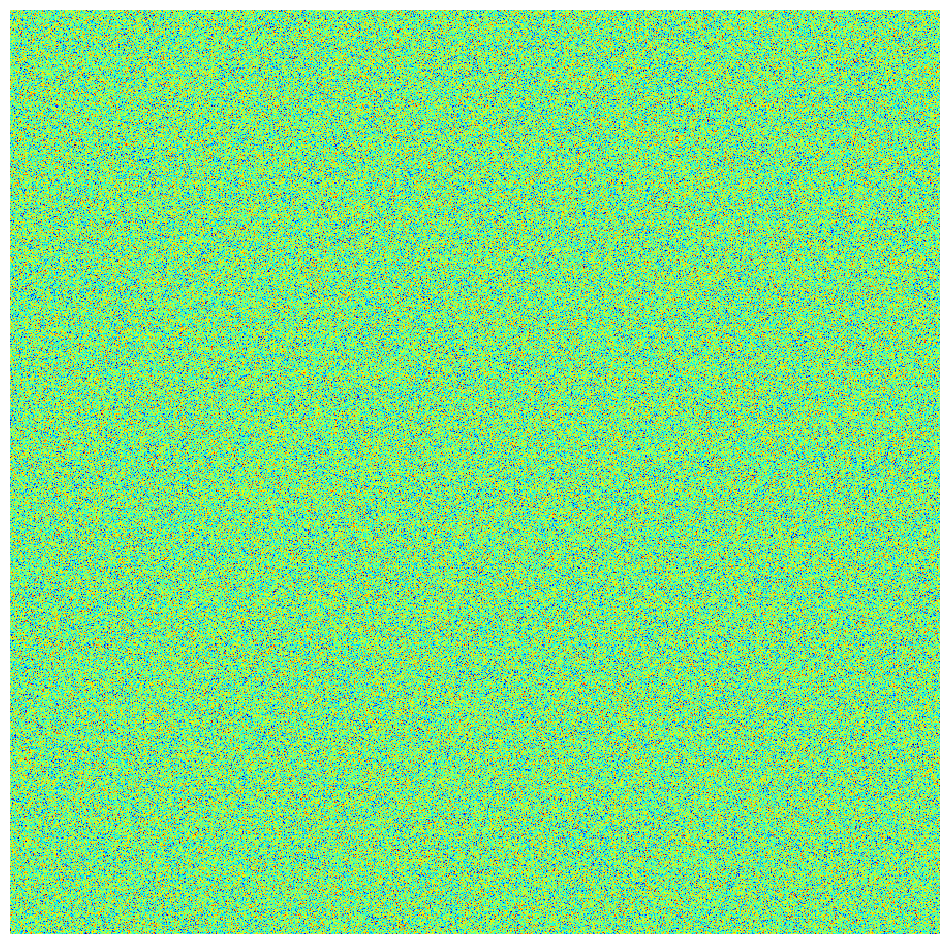

In [174]:
# Criar o heatmap sem título, eixo e outras coisas que atrapalham a imagem
plt.figure(figsize=(12,12))
plt.imshow(heatmap_data, cmap="jet", aspect="auto", interpolation="nearest")
plt.axis("off")
plt.show()

### Analisar imagem gerada

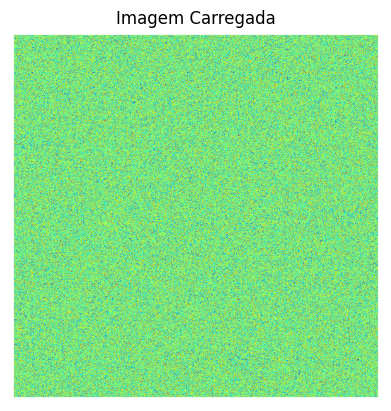

In [175]:
# Carregar a imagem
image_path = "/content/drive/MyDrive/Doutorado/Termografia/mapa_calor.png"
image = cv2.imread(image_path)

# Converter de BGR para RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Exibir a imagem para análise
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Imagem Carregada")
plt.show()

In [180]:
# Carregar a imagem
image_path = "/content/drive/MyDrive/Doutorado/Termografia/mapa_calor.png"
image = cv2.imread(image_path)

# Converter de BGR para RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir o mapa de cores usado no heatmap (jet)
colormap = cm.jet

# Criar a função para converter RGB para temperatura
def rgb_to_temperature(rgb_color, cmap=colormap, min_temp=0, max_temp=100):
    """
    Converte uma cor RGB em um valor de temperatura com base no mapa de cores fornecido.
    """
    # Normalizar o RGB para [0, 1]
    rgb_norm = np.array(rgb_color) / 255.0

    # Criar um vetor de cores do colormap
    colormap_values = cmap(np.linspace(0, 1, 256))[:, :3]  # Remover alpha channel

    # Calcular a menor distância entre a cor e o colormap
    distances = np.linalg.norm(colormap_values - rgb_norm, axis=1)
    index = np.argmin(distances)

    # Mapear para a escala de temperatura
    temperature = min_temp + (index / (len(colormap_values) - 1)) * (max_temp - min_temp)

    return temperature

# Obter dimensões da imagem
h, w, _ = image_rgb.shape

# Criar uma matriz para armazenar as temperaturas
temperature_map = np.zeros((h, w))

# Percorrer toda a imagem pixel por pixel
for i in range(h):
    for j in range(w):
        rgb_color = image_rgb[i, j, :]
        temperature_map[i, j] = rgb_to_temperature(rgb_color)



## Resultado

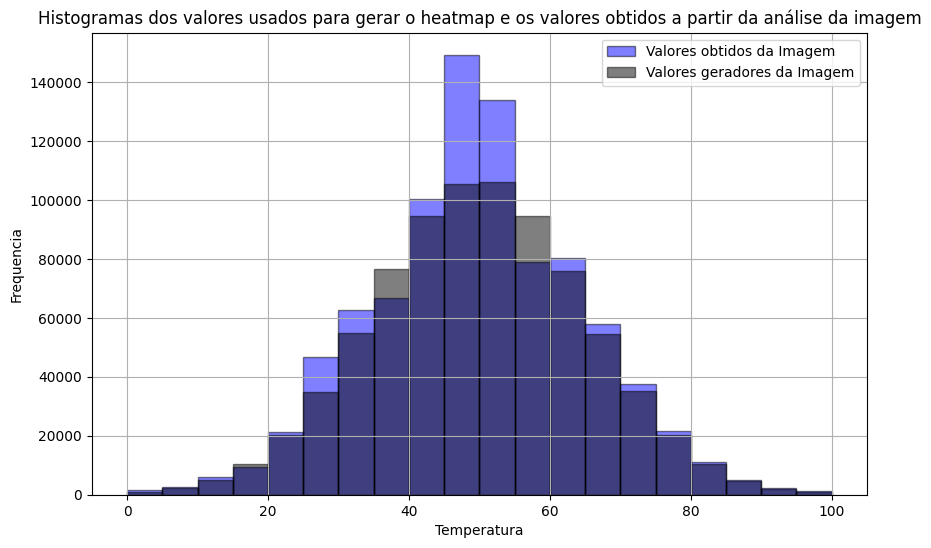

In [185]:
# Create the histograms
plt.figure(figsize=(10, 6))


plt.hist(temperature_map.flatten(), bins=20, alpha=0.5, label='Valores obtidos da Imagem', color='blue', edgecolor='black')
plt.hist(data, bins=20, alpha=0.5, label='Valores geradores da Imagem', color='black', edgecolor='black')

plt.xlabel('Temperatura')
plt.ylabel('Frequencia')
plt.title('Histogramas dos valores usados para gerar o heatmap e os valores obtidos a partir da análise da imagem')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()
